In [56]:
#import the required libraries
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [57]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt


In [58]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


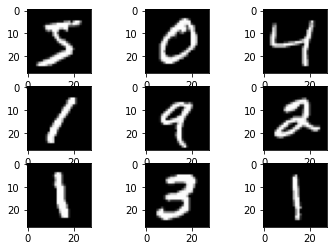

In [59]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [60]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [61]:
trainY

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [62]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [63]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [64]:
#prepare pixel data
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [65]:
#create cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [66]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

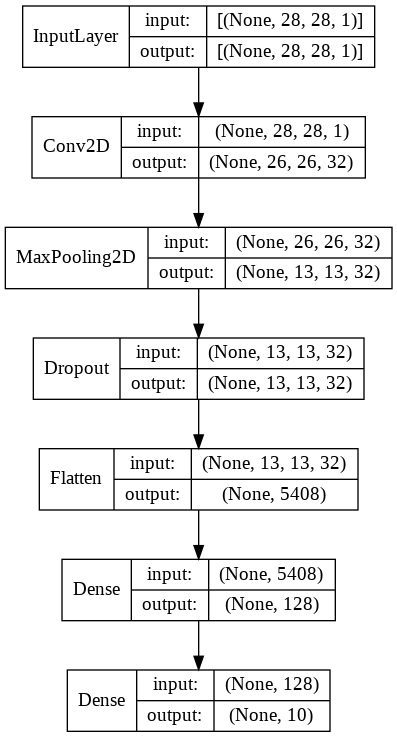

In [67]:
#model visualization
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [68]:
import numpy as np

In [69]:
# Add an empty color dimension as the Convolutional net is expecting this
x_train = np.expand_dims(train_norm, -1)
x_test = np.expand_dims(test_norm, -1)

# Train the CNN on the training data
history = model.fit(
    
      # Training data : features (images) and classes.
      x_train, trainY,
                    
      # number of samples to work through before updating the 
      # internal model parameters via back propagation.
      batch_size=256, 

      # An epoch is an iteration over the entire training data.
      epochs=10, 

      # The model will set apart his fraction of the training 
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of 
      # each epoch. 
      validation_split=0.2, 

      verbose=1) 

Epoch 1/10
188/188 [==============================] - 27s 138ms/step - loss: 0.3417 - accuracy: 0.9052 - val_loss: 0.1376 - val_accuracy: 0.9609
Epoch 2/10
188/188 [==============================] - 26s 140ms/step - loss: 0.1138 - accuracy: 0.9670 - val_loss: 0.0862 - val_accuracy: 0.9765
Epoch 3/10
188/188 [==============================] - 26s 138ms/step - loss: 0.0761 - accuracy: 0.9773 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 4/10
188/188 [==============================] - 26s 139ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 5/10
188/188 [==============================] - 26s 140ms/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0591 - val_accuracy: 0.9825
Epoch 6/10
188/188 [==============================] - 26s 138ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 7/10
188/188 [==============================] - 26s 138ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0523 - val_ac

In [70]:
test_y=np.argmax(testY,axis=1)

In [71]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predict_x=model.predict(x_test) 
classes_pred=np.argmax(predict_x,axis=1)
print(classification_report(test_y,classes_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



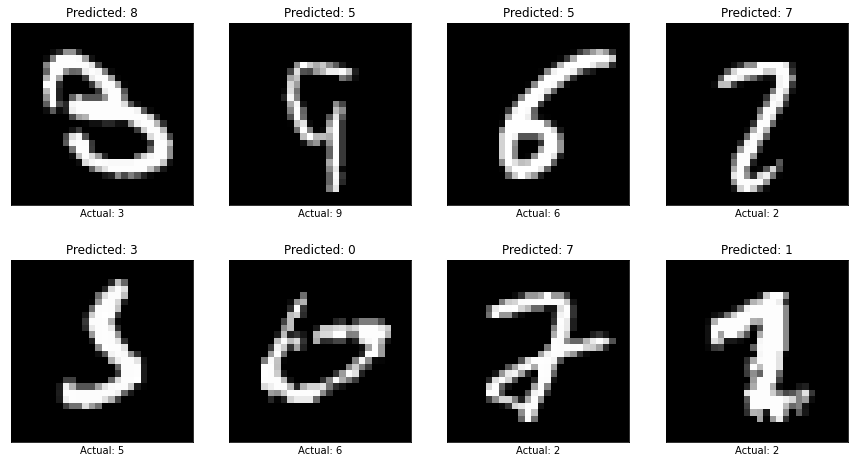

In [74]:
class_names=[0,1,2,3,4,5,6,7,8,9]
incorrect = np.nonzero(classes_pred!=test_y)[0]

# Display the first 8 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[incorrect].reshape(28, 28), cmap="gray")
    plt.title("Predicted: {}".format(class_names[classes_pred[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[test_y[incorrect]]))

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,classes_pred)

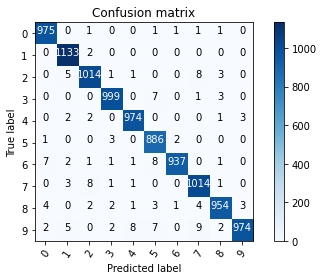

In [84]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=55)
plt.yticks(tick_marks, class_names)

normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
